# *Ecommerce Data Analysis*

 **Objective:**
 ob

The objective of this data analysis project is to gain insights into the ecommerce order
data of a fictional company. We will analyze customer information, product details, and
order history to derive meaningful conclusions that can aid business decision-making.


In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns  # For statistical data visualization
import mysql.connector  # For connecting to MySQL database

In [2]:
#connect to mysql
connection = mysql.connector.connect(
    host='localhost',
    user='root', #your username
    password='1234', #your password
    database='ecommerce' #the database from where you to want to fetch the data
)

In [3]:
#create a connection cursor object
cursor = connection.cursor()

In [4]:
# Query data from the 'customer' table
cursor.execute('SELECT * FROM customer')

#After fetching data from the database we are storing it into Pandas DataFrame
customer_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [5]:
# Query data from the 'product' table
cursor.execute('SELECT * FROM product')

#After fetching data from the database we are storing it into Pandas DataFrame
product_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])

In [6]:
# Query data from the 'order_details' table
cursor.execute('SELECT * FROM order_details')

#After fetching data from the database we are storing it into Pandas DataFrame
order_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [7]:

cursor.execute("""SELECT c.customer_id, c.name AS customer_name, c.city, c.email, c.phone_no, c.address, c.pin_code,
    o.order_id, o.product_id, o.quantity, o.total_price, o.payment_mode, o.order_date, o.order_status,
    p.product_name, p.category, p.sub_category, p.original_price, p.selling_price FROM customer c
    LEFT JOIN order_details o ON c.customer_id = o.customer_id
    LEFT JOIN product p ON o.product_id = p.product_id """)
cust_ord_df = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [8]:
# Close the MySQL connection
cursor.close()
connection.close()

In [9]:
# Showing first 5 records from 'customer' table
customer_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171
3,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429
4,C1005,Jack,Lake Buena Vista,Jack@gmail.com,8876345678,1520 E Buena Vista Drive,32830


In [10]:
# Showing first 5 records from 'product' table
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,P102,Chair,furniture,Chairs,20000.0,15000.00,10
1,P103,Laptop,Electronics,computer,60000.0,55000.00,50
2,P104,Smartphone,Electronics,phone,45000.0,40000.00,20
3,P105,Blender,Appliance,Electronics,500.0,450.00,10
4,P106,Laptop HP,Electronics,Computers,67200.0,55000.99,50


In [11]:
# Showing first 5 records from 'order' table
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,3,C1004,P112,1.0,1000.0,COD,2023-11-30,Pending
1,4,C1005,P102,1.0,20000.0,COD,2023-11-30,Pending
2,5,C1005,P102,1.0,20000.0,COD,2023-12-08,Delivered
3,7,C1006,P103,1.0,55000.0,COD,2023-12-15,Delivered
4,8,C1006,P102,1.0,15000.0,COD,2023-12-01,delivered


In [12]:
cust_ord_df.head()

,customer_id,customer_name,city,email,phone_no,address,pin_code,order_id,product_id,quantity,total_price,payment_mode,order_date,order_status,product_name,category,sub_category,original_price,selling_price
0,C1001,Steve,Tokyo,steve@gmail.com,4567897652,f.g.road,99,NaN,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
1,C1002,john,Sydney,john@gmail.com,9987234567,k.c.road,75001,NaN,None,NaN,NaN,None,NaT,None,None,None,None,NaN,NaN
2,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,10.0,P105,1.0,450.0,COD,2023-12-19,Pending,Blender,Appliance,Electronics,500.0,450.0
3,C1003,Peter,Kanagawa,peter.parker@mail.com,9969834567,2F Ikenobecho,171,11.0,P103,1.0,55000.0,COD,2023-12-21,Pending,Laptop,Electronics,computer,60000.0,55000.0
4,C1004,Jackson,Tokyo,Jackson@gmail.com,7765834567,"24-2, Sendagaya",8429,3.0,P112,1.0,1000.0,COD,2023-11-30,Pending,chair,Furniture,chairs,1000.0,800.0


## **Data Cleaning**

#### ***Customer***

In [13]:
customer_df.shape

(62, 7)

In [14]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  62 non-null     object
 1   name         62 non-null     object
 2   city         62 non-null     object
 3   email        62 non-null     object
 4   phone_no     62 non-null     object
 5   address      62 non-null     object
 6   pin_code     62 non-null     int64 
dtypes: int64(1), object(6)
memory usage: 3.5+ KB


In [15]:
customer_df.duplicated().sum()

0

#### ***Product***

In [16]:
product_df.shape

(61, 7)

In [17]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      61 non-null     object 
 1   product_name    61 non-null     object 
 2   category        61 non-null     object 
 3   sub_category    61 non-null     object 
 4   original_price  61 non-null     float64
 5   selling_price   61 non-null     float64
 6   stock           61 non-null     int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 3.5+ KB


In [18]:
product_df.duplicated().sum()

0

In [19]:
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       8
furniture       1
Name: count, dtype: int64

In [20]:
product_df['category'] = product_df['category'].replace('furniture','Furniture')
product_df['category'].value_counts()

category
Electronics    32
Appliance      20
Furniture       9
Name: count, dtype: int64

#### ***Order Details***

In [21]:
order_df.shape

(76, 8)

In [22]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      76 non-null     int64         
 1   customer_id   76 non-null     object        
 2   product_id    76 non-null     object        
 3   quantity      76 non-null     float64       
 4   total_price   76 non-null     float64       
 5   payment_mode  76 non-null     object        
 6   order_date    76 non-null     datetime64[ns]
 7   order_status  76 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 4.9+ KB


In [23]:
order_df['order_status'].value_counts()

order_status
Delivered    27
Pending      25
Shipped      16
Cancelled     6
delivered     1
Returned      1
Name: count, dtype: int64

In [24]:
order_df['order_status'] = order_df['order_status'].replace('delivered','Delivered')
order_df['order_status'].value_counts()

order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64

#### ***Customer Order Details***

In [25]:
cust_ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     79 non-null     object        
 1   customer_name   79 non-null     object        
 2   city            79 non-null     object        
 3   email           79 non-null     object        
 4   phone_no        79 non-null     object        
 5   address         79 non-null     object        
 6   pin_code        79 non-null     int64         
 7   order_id        76 non-null     float64       
 8   product_id      76 non-null     object        
 9   quantity        76 non-null     float64       
 10  total_price     76 non-null     float64       
 11  payment_mode    76 non-null     object        
 12  order_date      76 non-null     datetime64[ns]
 13  order_status    76 non-null     object        
 14  product_name    76 non-null     object        
 15  category

In [26]:
cust_ord_df.isnull().sum()

customer_id       0
customer_name     0
city              0
email             0
phone_no          0
address           0
pin_code          0
order_id          3
product_id        3
quantity          3
total_price       3
payment_mode      3
order_date        3
order_status      3
product_name      3
category          3
sub_category      3
original_price    3
selling_price     3
dtype: int64

In [27]:
cust_ord_df['order_id'].bfill(inplace=True)
cust_ord_df['product_id'].bfill(inplace=True)
cust_ord_df['quantity'].fillna(cust_ord_df['quantity'].mode()[0],inplace=True)
cust_ord_df['total_price'].fillna(cust_ord_df['total_price'].mean(),inplace=True)
cust_ord_df['payment_mode'].fillna(cust_ord_df['payment_mode'].mode()[0],inplace=True)
cust_ord_df['order_date'].fillna(cust_ord_df['order_date'].mode()[0], inplace=True)
cust_ord_df['order_status'].fillna('Processing', inplace=True)

In [28]:
cust_ord_df['product_name'].fillna(cust_ord_df['product_name'].mode()[0],inplace=True)
cust_ord_df['category'].fillna(cust_ord_df['category'].mode()[0],inplace=True)
cust_ord_df['sub_category'].fillna(cust_ord_df['sub_category'].mode()[0],inplace=True)
cust_ord_df['original_price'].fillna(cust_ord_df['original_price'].median(),inplace=True)
cust_ord_df['selling_price'].fillna(cust_ord_df['selling_price'].median(),inplace=True)

In [29]:
cust_ord_df.isnull().sum()

customer_id       0
customer_name     0
city              0
email             0
phone_no          0
address           0
pin_code          0
order_id          0
product_id        0
quantity          0
total_price       0
payment_mode      0
order_date        0
order_status      0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
dtype: int64

In [30]:
cust_ord_df['category'] = cust_ord_df['category'].replace('furniture','Furniture')
cust_ord_df['category'].value_counts()

category
Electronics    37
Appliance      27
Furniture      15
Name: count, dtype: int64

In [31]:
cust_ord_df['order_status'] = cust_ord_df['order_status'].replace('delivered','Delivered')
cust_ord_df['order_status'].value_counts()

order_status
Delivered     28
Pending       25
Shipped       16
Cancelled      6
Processing     3
Returned       1
Name: count, dtype: int64

## **Exploratory Data Analysis (EDA) and Visualization:**

In [32]:
# Generate a descriptive summary for categorical columns in the 'customer_df' DataFrame
customer_df.describe(include=object)

,customer_id,name,city,email,phone_no,address
count,62,62,62,62,62,62
unique,62,39,4,52,26,57
top,C1001,Ava,Tokyo,henry@gmail.com,1234567890,oo.pp.road
freq,1,4,22,3,11,2


In [33]:
# Generate a descriptive summary of the 'product_df' DataFrame using the describe() method
product_df.describe().T

,count,mean,std,min,25%,50%,75%,max
original_price,61.0,21011.491639,19078.897228,500.0,6000.0,15000.0,30000.0,80000.0
selling_price,61.0,17774.622623,16643.506566,450.0,5000.0,12000.0,25000.0,70000.0
stock,61.0,23.852459,13.984320,10.0,15.0,20.0,28.0,100.0


In [34]:
# Generate a descriptive summary for categorical columns in the 'product_df' DataFrame
product_df.describe(include=object)

,product_id,product_name,category,sub_category
count,61,61,61,61
unique,61,43,3,22
top,P102,Tablet,Electronics,Electronics
freq,1,4,32,20


In [35]:
# Generate a descriptive summary of the 'product_df' DataFrame using the describe() method
order_df.describe().T

,count,mean,min,25%,50%,75%,max,std
order_id,76.0,51.144737,3.0,22.75,57.5,76.25,95.0,28.67366
quantity,76.0,1.355263,1.0,1.0,1.0,2.0,3.0,0.558664
total_price,76.0,20873.684211,450.0,6500.0,16500.0,30000.0,90000.0,18442.574791
order_date,76,2024-02-02 03:28:25.263158016,2023-11-23 00:00:00,2024-01-02 18:00:00,2024-02-12 12:00:00,2024-03-02 06:00:00,2024-03-21 00:00:00,NaN


In [36]:
# Generate a descriptive summary of the 'order_df' DataFrame using the describe() method
order_df.describe(include=object)

,customer_id,product_id,payment_mode,order_status
count,76,76,76,76
unique,59,58,2,5
top,C1013,P102,Online,Delivered
freq,3,3,43,28


In [37]:
# Generate a descriptive summary for categorical columns in the 'cust_ord_df' DataFrame
cust_ord_df.describe(include= object).T

,count,unique,top,freq
customer_id,79,62,C1013,3
customer_name,79,39,Mia,5
city,79,4,Kanagawa,25
email,79,52,mia@example.com,4
phone_no,79,26,1234567890,12
address,79,57,pqr street,4
product_id,79,58,P105,4
payment_mode,79,2,Online,46
order_status,79,6,Delivered,28
product_name,79,40,Tablet,8


In [38]:
# Generate a descriptive summary of the 'cust_ord_df' DataFrame using the describe() method
cust_ord_df.describe()

,pin_code,order_id,quantity,total_price,order_date,original_price,selling_price
count,79.000000,79.000000,79.000000,79.000000,79,79.000000,79.000000
mean,38247.189873,49.620253,1.341772,20873.684211,2024-01-30 17:00:45.569620224,19829.113924,16784.810127
min,99.000000,3.000000,1.000000,450.000000,2023-11-23 00:00:00,500.000000,450.000000
25%,12345.000000,20.500000,1.000000,7000.000000,2023-12-31 12:00:00,6500.000000,5000.000000
50%,32830.000000,56.000000,1.000000,18000.000000,2024-02-11 00:00:00,15000.000000,12000.000000
75%,56789.000000,75.500000,2.000000,28500.000000,2024-03-01 12:00:00,30000.000000,25000.000000
max,98766.000000,95.000000,3.000000,90000.000000,2024-03-21 00:00:00,80000.000000,70000.000000
std,29304.160483,29.159290,0.552061,18084.432450,NaN,17431.897906,15436.709815


#### **Customer Analysis:**

##### *Identify the total number of customers city wise.*

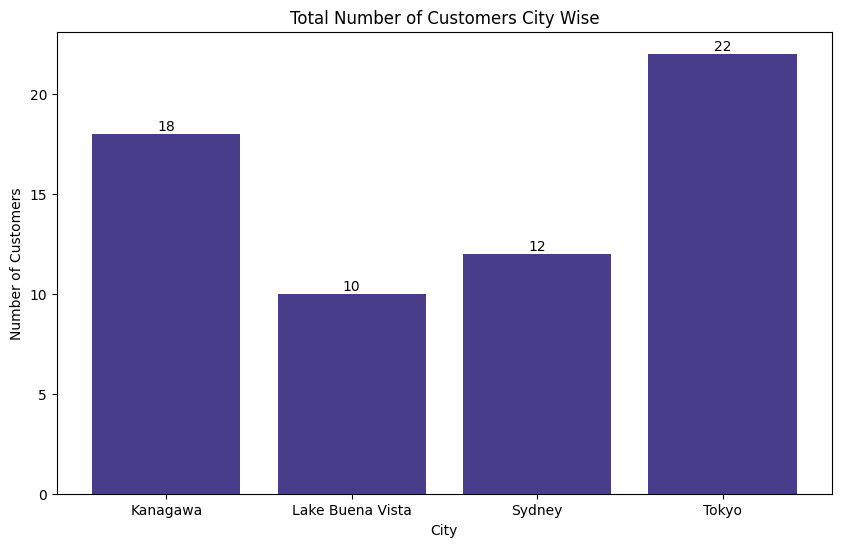

In [39]:
# Group by city and count the number of customers in each city
city_wise_customers = customer_df.groupby('city')['customer_id'].count().reset_index()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(city_wise_customers['city'], city_wise_customers['customer_id'], color='DarkSlateBlue')

# Displaying the exact values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', color='black')

# Adding labels and title
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers City Wise')
# Show the plot
plt.show()

This bar chart provides a comparison of the customer count across four cities. 

- **Tokyo** has the **highest** number of customers, with a total of **22**.
- **Kanagawa** follows with **18** customers.
- **Sydney** has a total of **12** customers.
- **Lake Buena Vista** has the **lowest** number of customers, with a total of **10**.

This data suggests that the business is most popular in Tokyo and least popular in Lake Buena_282036383. 10.fhesis-testing.f 10.

##### *Identify the most frequent customers based on their order history*

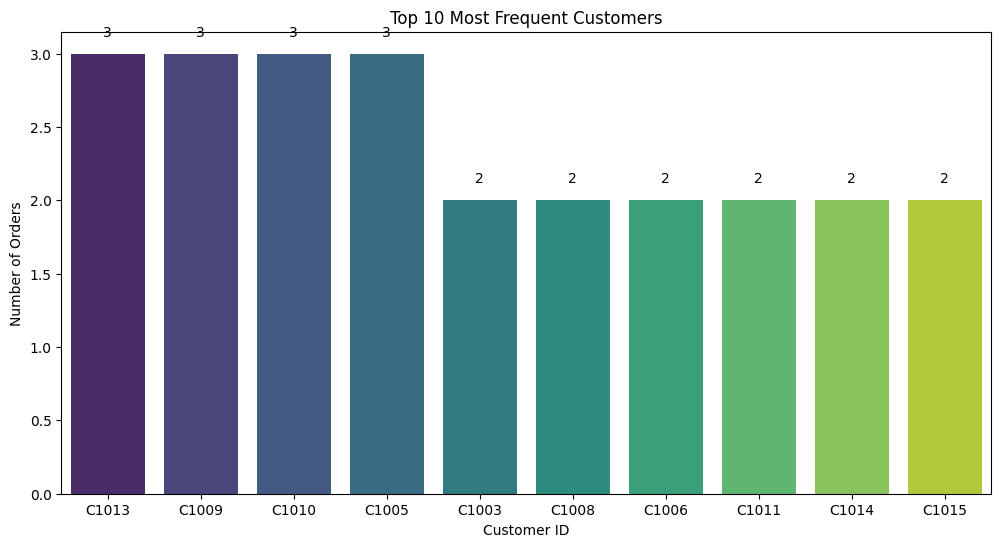

In [40]:
# Identify the most frequent customers based on their order history
most_frequent_customers = order_df['customer_id'].value_counts().head(10)

# Define a custom color palette
custom_palette = sns.color_palette('viridis', n_colors=len(most_frequent_customers))

# Plotting the results
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=most_frequent_customers.index, y=most_frequent_customers.values, hue=most_frequent_customers.index, palette=custom_palette, legend=False)
plt.title('Top 10 Most Frequent Customers')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')

# Display exact values on each bar
for index, value in enumerate(most_frequent_customers.values):
    bar_plot.text(index, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.show()

This bar chart provides an overview of the number of orders placed by the top 10 customers. 
- Four customers (**C1013**, **C1010**, **C1005**, and **C1009**) have each placed **3 orders**.
- The remaining six customers (**C0317**, **C0816**, **C0615**, **C1114**, **C1411**, and **C1519**) have each placed **2 orders**.

This data suggests that customers C1013, C1010, C1005, and C1009 are the most frequent custo2_369707313.*

#### **Product Analysis:**

##### *Determine the total number of products available by category*

In [ ]:
# Group by product_name and calculate the total quantity sold for each product
product_sales = cust_ord_df.groupby('product_name')['quantity'].sum().sort_values()

# Get the top 10 slow-moving products based on low sales
slow_moving_products = product_sales.head(10)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x=slow_moving_products.index, y=slow_moving_products.values, palette='viridis')
plt.title('Top 10 Slow-Moving Products Based on Low Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

##### *Determine the total number of products available by category*

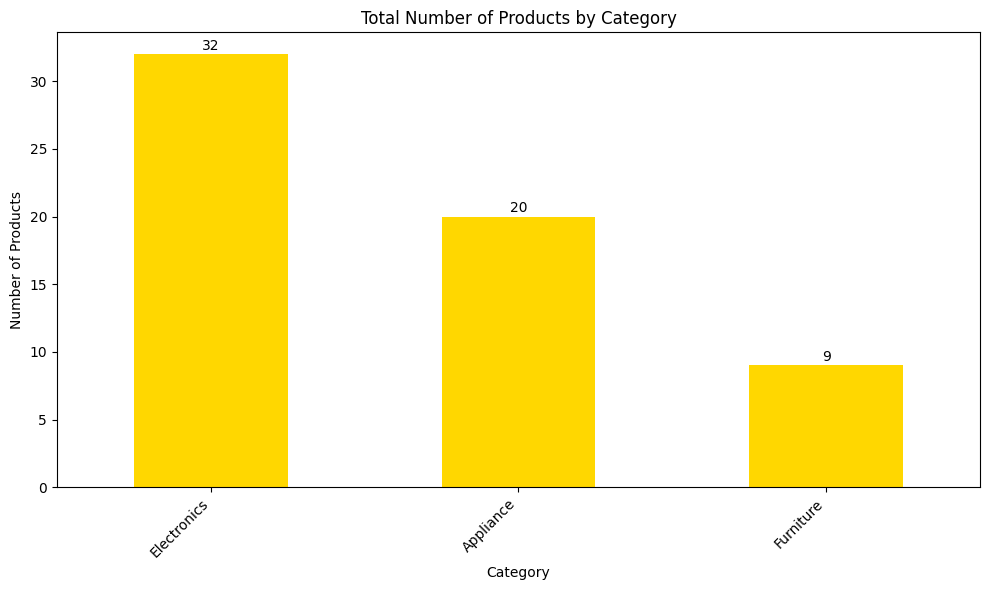

In [41]:
# Grouping by category and counting the number of products
category_counts = product_df['category'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='Gold')
plt.title('Total Number of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')

# Displaying exact values on top of each bar
for index, value in enumerate(category_counts):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The bar chart presents the distribution of products across three categories: Electronics, Appliance, and Furniture. 
- **Electronics**: This category has the highest number of products, totaling 32.
- **Appliance**: This category comes second with a total of 20 products.
- **Furniture**: This category has the least number of products, with a total of 9.

In conclusion, Electronics is the most populated category, while Furniture has the fewest prolsonaro/.

##### *Analyze the the distribution of products across sub-categories*

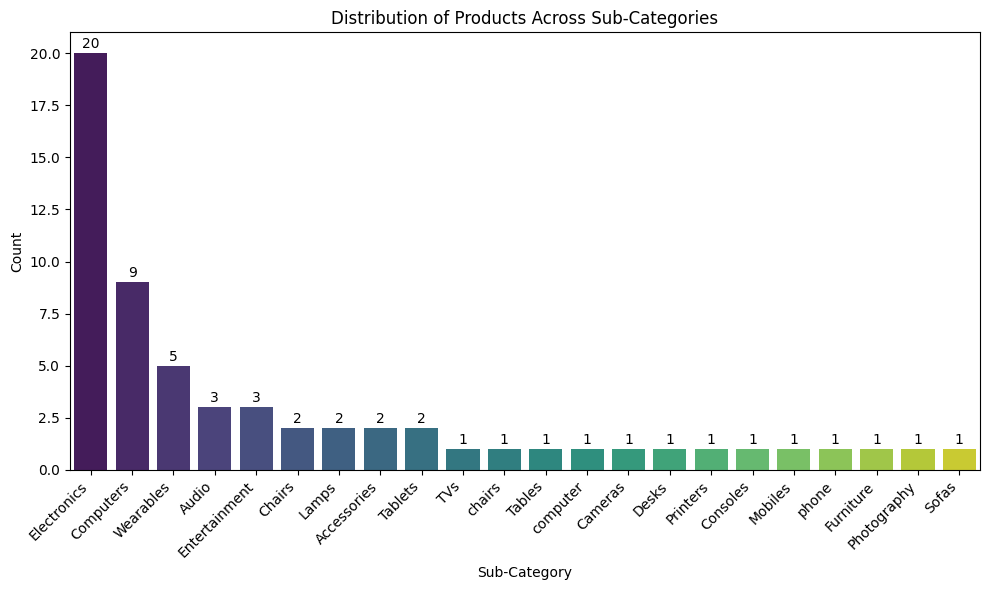

In [42]:
# Analyze distribution of products across sub-categories
sub_category_counts = product_df['sub_category'].value_counts()

# Visualize using bar chart with color palette
plt.figure(figsize=(10, 6))
sns.barplot(x=sub_category_counts.index, y=sub_category_counts.values, hue=sub_category_counts.index, palette='viridis', dodge=False)
plt.title('Distribution of Products Across Sub-Categories')
plt.xlabel('Sub-Category')
plt.ylabel('Count')

# Display exact values on top of the bars
for i, value in enumerate(sub_category_counts):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')

# Explicitly set legend labels and hide legend
plt.legend(labels=[''], title=None).set_visible(False)

plt.tight_layout()
plt.show()

The bar chart provides a breakdown of products across various sub-categories. 

- **Electronics**: This sub-category has the highest count, nearly reaching 20.
- **Computers and Wearables**: These sub-categories follow Electronics but have significantly fewer products.
- **Other Sub-Categories**: Chairs, Audio Entertainment, Lamps & Accessories, Tablets, TVs, Mobiles, Computer Cameras, Printers, Consoles have fewer numbers of products.
- **Furniture, Photography, and Spas**: These sub-categories have the least number of products, with a count of 1.

In conclusion, Electronics is the most populated sub-category, while Furniture, Photography, and Spas have the fewest products.

##### *Identify products with low stock levels*

Products with Low Stock:
   product_id         product_name  stock
0        P102                Chair     10
3        P105              Blender     10
10       P112                chair     10
12       P114         Refrigerator     12
30       P132             Sofa Set     10
33       P135           Dishwasher     12
39       P141              Printer     10
42       P144  External Hard Drive     12
46       P148               Tablet     10


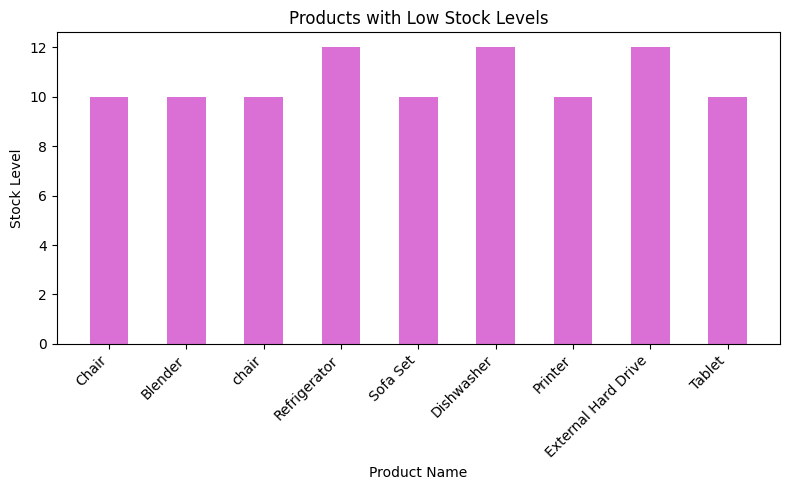

In [43]:
# Identify products with low stock levels
low_stock_products = product_df[product_df['stock'] < 15]

# Display the products with low stock levels
print("Products with Low Stock:")
print(low_stock_products[['product_id', 'product_name', 'stock']])

# Visualize products with low stock levels
plt.figure(figsize=(8, 5))
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='Orchid', width=0.5)
plt.xlabel('Product Name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


This bar chart shows that which products have low stock levels . This suggests that these items may need to be restocked soon.

#####  *Calculate the average maximum and minimum selling prices for products*

Average Price: 17774.62262295082
Maximum Price: 70000.0
Minimum Price: 450.0


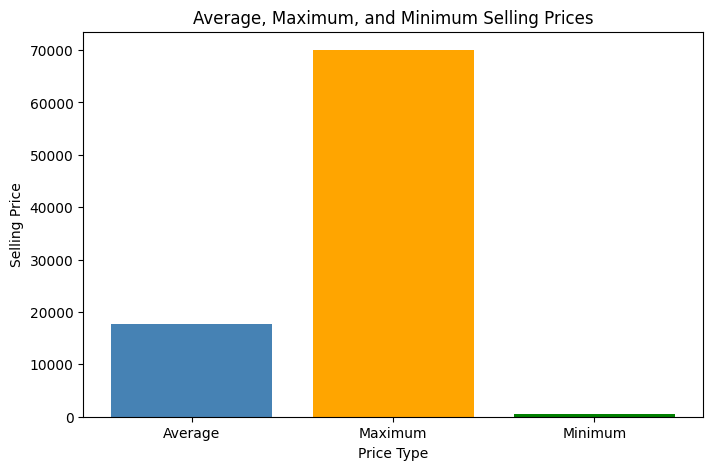

In [44]:
# Calculate the average, maximum, and minimum prices for products
average_price = product_df['selling_price'].mean()
max_price = product_df['selling_price'].max()
min_price = product_df['selling_price'].min()

# Display the results
print("Average Price:", average_price)
print("Maximum Price:", max_price)
print("Minimum Price:", min_price)

# Plotting the results
plt.figure(figsize=(8, 5))
plt.bar(['Average', 'Maximum', 'Minimum'], [average_price, max_price, min_price], color=['SteelBlue', 'orange', 'green'])
plt.title('Average, Maximum, and Minimum Selling Prices')
plt.xlabel('Price Type')
plt.ylabel('Selling Price')
plt.show()

#### **Order Analysis:**

##### *Calculate the top 10 orders product wise*

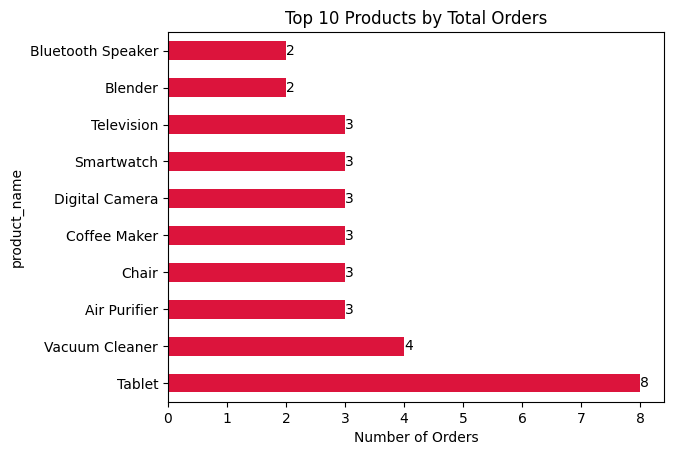

In [45]:
# Top 10 products by total orders
top_orders = cust_ord_df.groupby('product_name')['order_id'].count().nlargest(10)

# Plot the horizontal bar chart
ax = top_orders.plot(kind='barh', title='Top 10 Products by Total Orders', color='Crimson')
ax.set_xlabel('Number of Orders')

# Display the exact values on each bar
for index, value in enumerate(top_orders):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')

# Display the plot
plt.show()

The bar chart titled "Top 10 Products by Total Orders" shows the number of orders for various products:

- **Tablets** are the most ordered product with 5 orders.
- **Vacuum Cleaners** are the second most ordered product with 4 orders.
- **Televisions, Air Purifiers, Coffee Makers, Chairs, and Smartwatches** each have 3 orders.
- **Bluetooth Speakers and Blenders** have the least orders with 2 each.

This suggests that tablets are currently the most popular product, while Bluetooth Speakers and Blenders are less in asic.html.

##### *Analyze the order status distribution)*

order_status
Delivered    28
Pending      25
Shipped      16
Cancelled     6
Returned      1
Name: count, dtype: int64


Text(0.5, 1.0, 'Order Status Distribution')

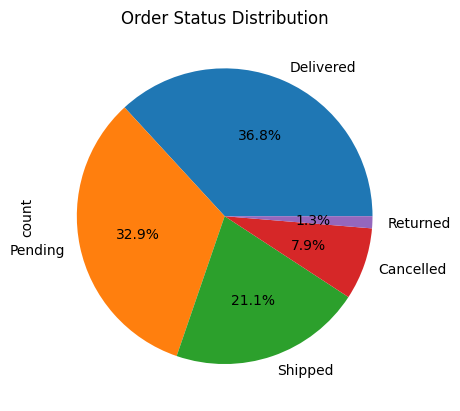

In [46]:
# Order status distribution
order_status = order_df['order_status'].value_counts()
print(order_status)

# Plot pie chart
ax = order_status.plot(kind='pie', autopct='%1.1f%%')
ax.set_title('Order Status Distribution')

The pie chart titled "Order Status Distribution" shows the distribution of order statuses:

- **Delivered** orders make up the largest portion at 36.8%.
- **Pending** orders account for 32.9%.
- **Shipped** orders represent 21.1%.
- **Returned** orders make up a smaller portion at 7.9%.
- **Cancelled** orders are the least common, at only 1.3%.

This suggests that a significant portion of orders have been successfully delivered, while a sizable number are still pending or have been shipped. Only a small percentage of orders are returned or cancelled.

##### *Identify the most popular products based on order quantity*

C:\Users\anany\AppData\Local\Temp\ipykernel_29428\211980434.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_orders.index, y=top_orders.values, palette="PuBuGn_r")


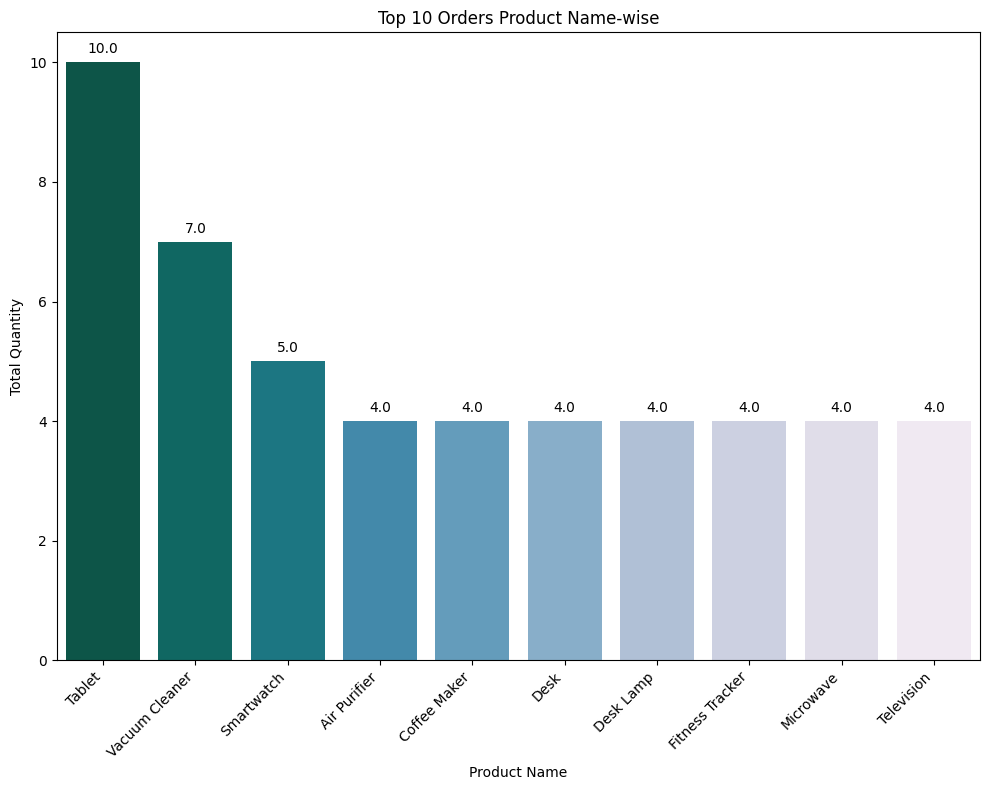

In [47]:
# Calculate total revenue product-wise
product_revenue = cust_ord_df.groupby('product_name')['total_price'].sum().reset_index()

# Calculate the top 10 orders product name-wise
top_orders = cust_ord_df.groupby('product_name')['quantity'].sum().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(10, 8))
sns.barplot(x=top_orders.index, y=top_orders.values, palette="PuBuGn_r")
plt.title('Top 10 Orders Product Name-wise')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity')
plt.xticks(rotation=45, ha='right')

# Display the exact values on top of each bar
for i, value in enumerate(top_orders.values):
    plt.text(i, value + 0.1, str(round(value, 2)), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

The bar chart titled shows the total quantity ordered for various products:

- **Tablets** and **Vacuum Cleaners** are the most popular, with 7 units each ordered.
- **Smartwatches** follow with 5 units ordered.
- **Air Purifiers, Coffee Makers, Desks, Desk Lamps, Fitness Trackers, Microwaves, and Televisions** have an equal popularity with 4 units each ordered.

This suggests that Tablets and Vacuum Cleaners are currently the most popular products, while other listed products have moderate demand.

#### **Sales Analysis:**

##### *Calculate total revenue generated from orders product wise.*

C:\Users\anany\AppData\Local\Temp\ipykernel_29428\3829277722.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='product_name', y='total_price', data=top_10_products, palette='viridis')


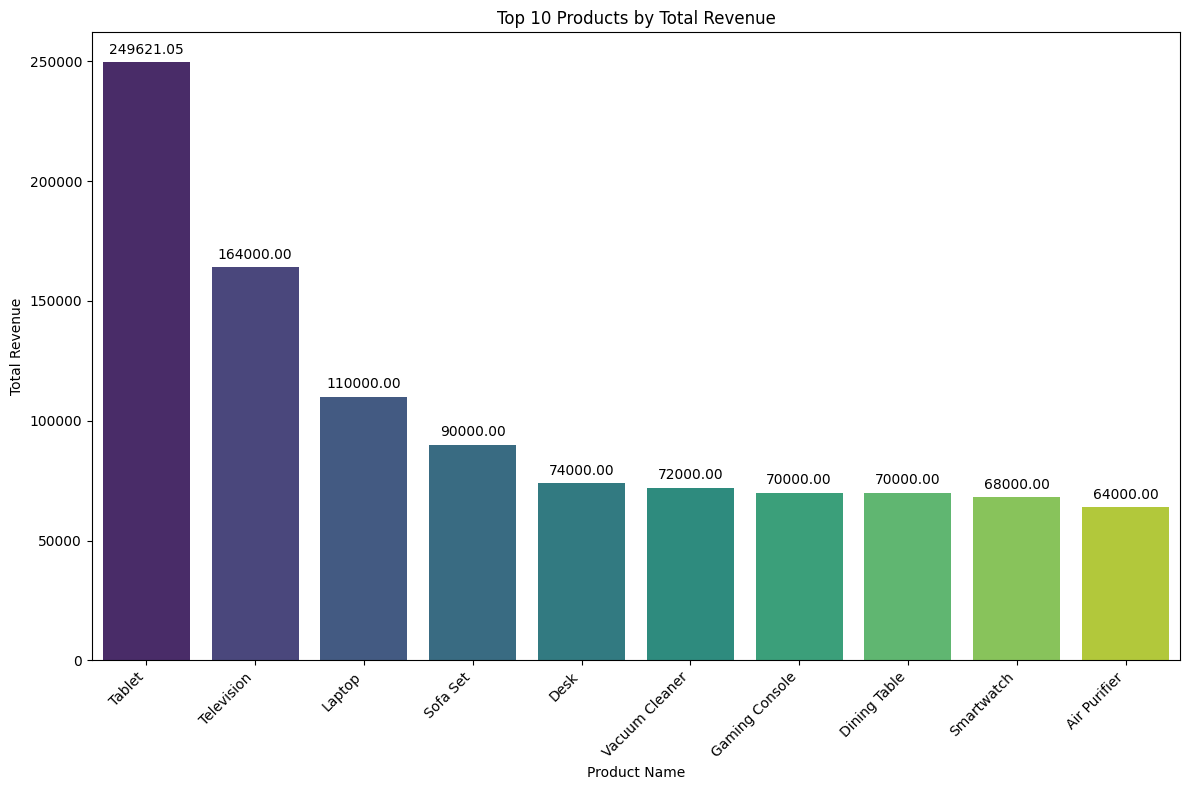

In [48]:
# Calculate total revenue per product
cust_ord_df['total_revenue_per_product'] = order_df['total_price'] * order_df['quantity']

# Group by 'product_id' and sum the total revenues to get total revenue per product
total_revenue_per_product = cust_ord_df.groupby('product_name')['total_revenue_per_product'].sum().reset_index()

# Sort the values to get the top 10 products
top_10_products = product_revenue.sort_values(by='total_price', ascending=False).head(10)


# Plotting the bar chart
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='product_name', y='total_price', data=top_10_products, palette='viridis')
bar_plot.set(xlabel='Product Name', ylabel='Total Revenue', title='Top 10 Products by Total Revenue')

# Displaying the exact values on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

The chart shows the total revenue generated by the top 10 products sold. The tablet is the most profitable product, followed by the television and the laptop. The revenue gap between the tablet and the other products is significant, indicating a high demand for tablets among the customers

##### *Calculate the total revenue generated from all orders*

In [49]:
# Calculate total revenue generated from all orders
total_revenue = cust_ord_df['total_price'].sum()
print(total_revenue)

1649021.0526315789


##### *Calculate total revenue product category wise percentage*

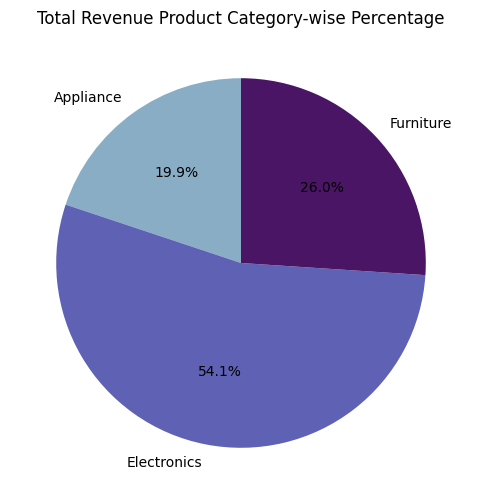

In [50]:
# Group by category and calculate the total revenue
category_wise_revenue = cust_ord_df.groupby('category')['total_price'].sum()

# Plotting the results using a pie chart
plt.figure(figsize=(6, 6))
plt.pie(category_wise_revenue, labels=category_wise_revenue.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('twilight'))
plt.title('Total Revenue Product Category-wise Percentage')
plt.show()

The chart shows the total revenue product category-wise percentage for a fictional ecommerce company.
Electronics is the most profitable category, accounting for more than half of the total revenue (54.1%).
Furniture is the second most profitable category, contributing 26% of the total revenue.
Appliance is the least profitable category, generating only 19.9% of the total revenue.

C:\Users\anany\AppData\Local\Temp\ipykernel_29428\1762647969.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='category', y='total_price', data=category_sales, palette='viridis')


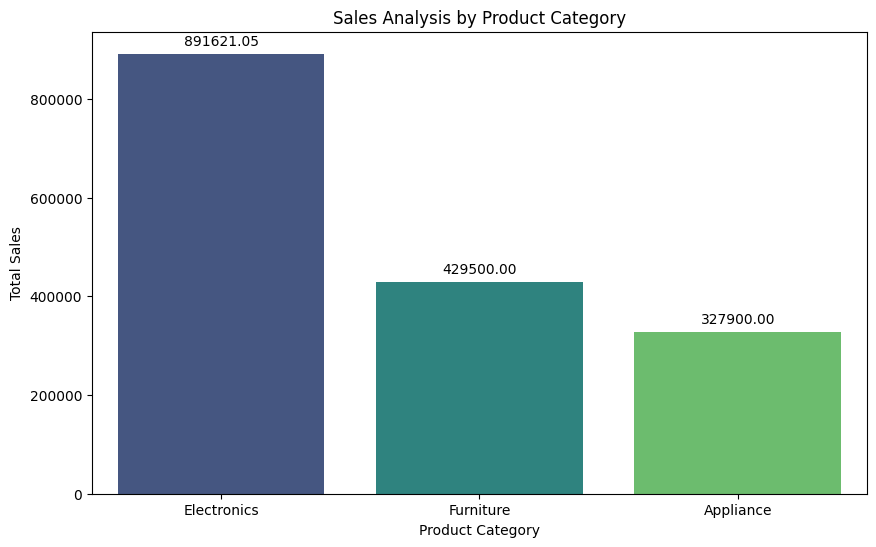

In [51]:
# Group by 'category' and sum the 'total_price' for each category
category_sales = cust_ord_df.groupby('category')['total_price'].sum().reset_index()

# Sort the data by total sales in descending order
category_sales = category_sales.sort_values(by='total_price', ascending=False)

# Plot the bar chart using seaborn and matplotlib
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='category', y='total_price', data=category_sales, palette='viridis')

# Display exact values on each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

plt.title('Sales Analysis by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

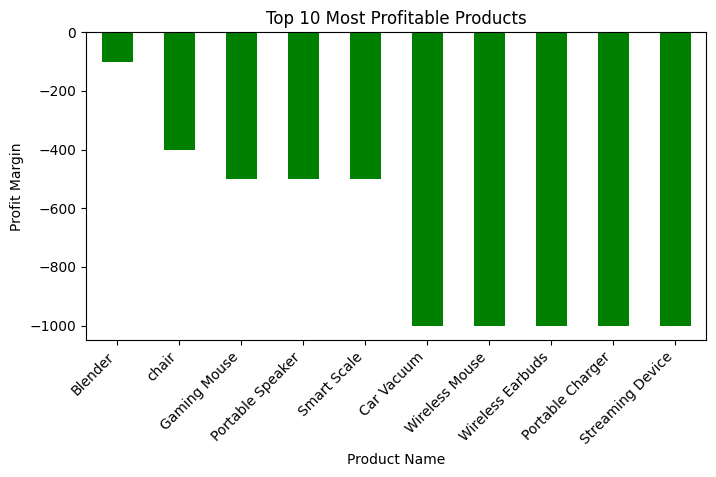

In [52]:
# Identify the most profitable products based on the difference between original and selling prices
cust_ord_df['profit_margin'] = cust_ord_df['selling_price'] - cust_ord_df['original_price']
most_profitable_products = cust_ord_df.groupby('product_name')['profit_margin'].sum().sort_values(ascending=False)

# Plotting the most profitable products
plt.figure(figsize=(8, 4))
most_profitable_products.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Most Profitable Products')
plt.xlabel('Product Name')
plt.ylabel('Profit Margin')
plt.xticks(rotation=45, ha='right')
plt.show()

The chart illustrates the profit margins of the top 10 products. Here, all products are showing negative profit margins, indicating that they are incurring losses. The products, listed from left to right, are Blender, Smart Scale, Portable Speaker, Gaming Mouse, Streaming Device, Electric Toothbrush, Wireless Mouse, Wireless Earbuds, Car Vacuum, and Portable Charger. Among these, the Blender has the least negative margin, suggesting it’s the least loss-making product. On the other hand, the Portable Charger has the highest negative margin, indicating it’s the most loss-making product. 

#### **Customer Order Patterns:**

##### *Identify product names with the highest and lowest order quantities*

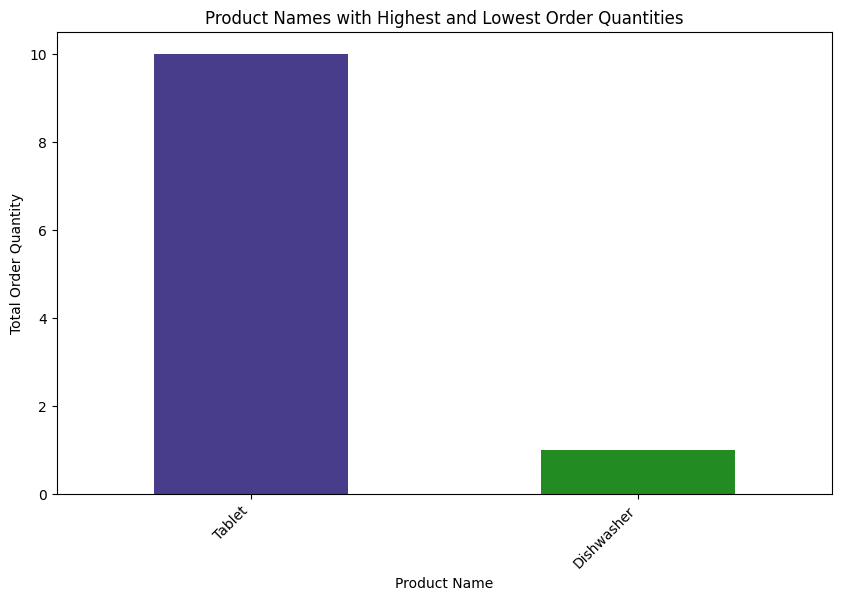

In [53]:
# Calculate total order quantities for each product
product_order_quantities = cust_ord_df.groupby('product_name')['quantity'].sum()

# Identify product names with the highest and lowest order quantities
highest_quantity_product = product_order_quantities.idxmax()
lowest_quantity_product = product_order_quantities.idxmin()

# Create a bar chart showing only the product names with the highest and lowest order quantities
plt.figure(figsize=(10, 6))
product_order_quantities[[highest_quantity_product, lowest_quantity_product]].plot(kind='bar', color=['DarkSlateBlue', 'ForestGreen'])
plt.title('Product Names with Highest and Lowest Order Quantities')
plt.xlabel('Product Name')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

##### *Identify customers with the highest and lowest order quantities by customer name*

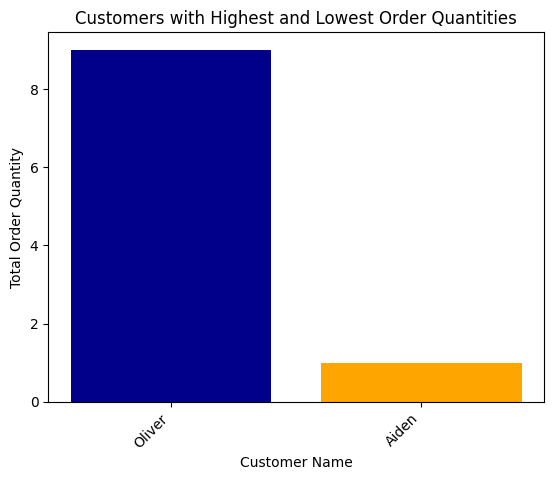

In [54]:
# Calculate total order quantity for each customer
customer_order_quantity = cust_ord_df.groupby('customer_name')['quantity'].sum()

# Identify customers with the highest and lowest order quantities
top_customer = customer_order_quantity.idxmax()
bottom_customer = customer_order_quantity.idxmin()

# Plotting the results
plt.bar([top_customer, bottom_customer], [customer_order_quantity[top_customer], customer_order_quantity[bottom_customer]],
        color=['DarkBlue', 'orange'])
plt.title('Customers with Highest and Lowest Order Quantities')
plt.xlabel('Customer Name')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45, ha='right')
plt.show()

##### *Determine the most preferred payment modes*

payment_mode
Online    46
COD       33
Name: count, dtype: int64


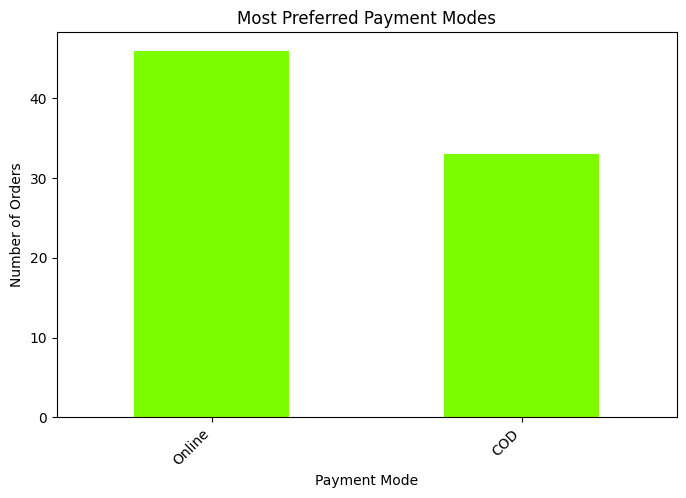

In [55]:
# Count the occurrences of each payment mode
payment_mode_counts = cust_ord_df['payment_mode'].value_counts()
print(payment_mode_counts)

# Plotting the results
plt.figure(figsize=(8, 5))
payment_mode_counts.plot(kind='bar', color='LawnGreen')
plt.title('Most Preferred Payment Modes')
plt.xlabel('Payment Mode')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Time-based Analysis:**

##### *Month wise total sales*

C:\Users\anany\AppData\Local\Temp\ipykernel_29428\3924757881.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_total_sales.index, y=monthly_total_sales.values, palette='viridis')


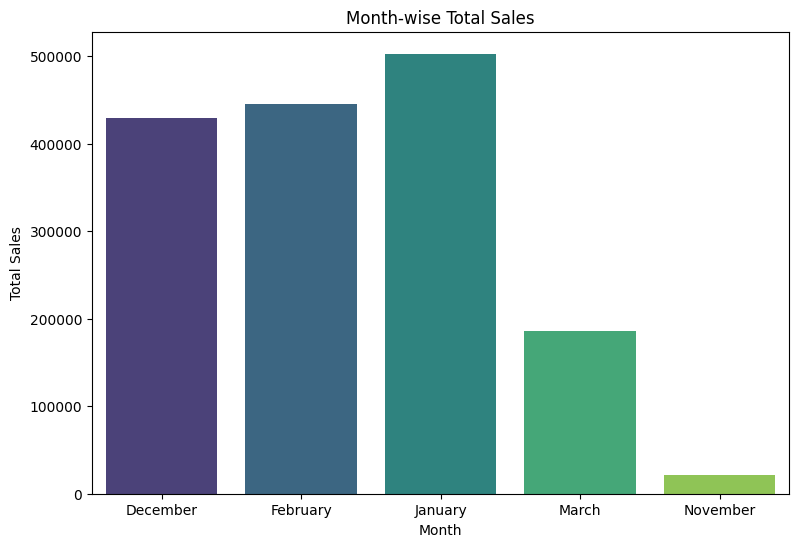

In [56]:
# Extract month from 'order_date' and create a new column
order_df['month'] = order_df['order_date'].dt.month_name()

# Group by month and calculate total sales
monthly_total_sales = order_df.groupby('month')['total_price'].sum()

# Plotting the results using seaborn for better aesthetics
plt.figure(figsize=(9, 6))
sns.barplot(x=monthly_total_sales.index, y=monthly_total_sales.values, palette='viridis')
plt.title('Month-wise Total Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

The bar graph titled “Month-wise Total Sales” shows the total sales for each month from November 2023 to March 2024. January has the highest sales, followed closely by February and December. However, there is a significant drop in sales in March, and November has the lowest sales. This suggests that sales performance varies greatly from month to month, with the beginning of the year showing the strongest sales performance. 

##### *Month and year wise total sales*

C:\Users\anany\AppData\Local\Temp\ipykernel_29428\1921923705.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index.strftime('%B %Y'), y=monthly_sales.values, palette='viridis')


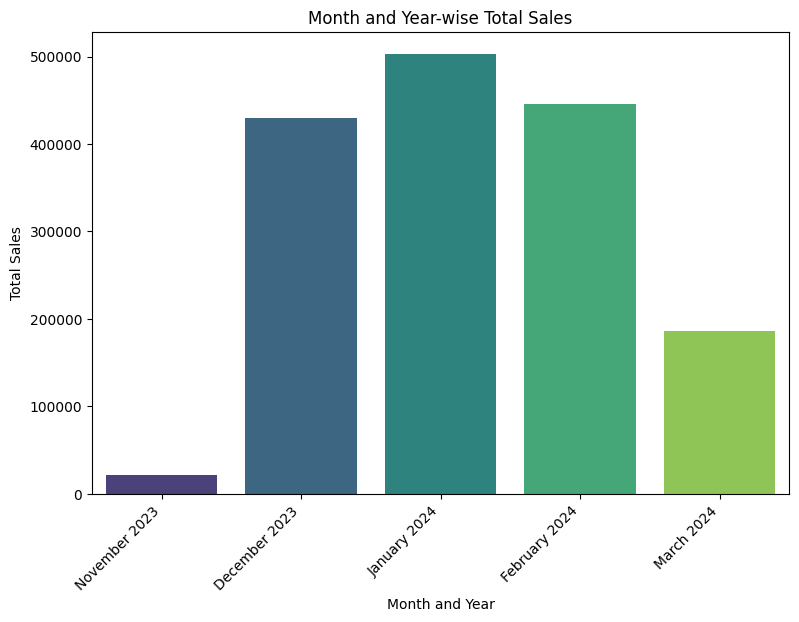

In [57]:

# Extract month and year from order_date
order_df['month_year'] = order_df['order_date'].dt.to_period('M')

# Group by month and year, calculate total sales
monthly_sales = order_df.groupby('month_year')['total_price'].sum()

# Plotting the results
plt.figure(figsize=(9, 6))
sns.barplot(x=monthly_sales.index.strftime('%B %Y'), y=monthly_sales.values, palette='viridis')
plt.title('Month and Year-wise Total Sales')
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar graph titled “Month and Year-wise Total Sales” shows a significant increase in total sales from November 2023 to February 2024, followed by a sharp decline in March 2024. This suggests that while sales were strong at the end of 2023 and the beginning of 2024, they dropped significantly in March 2024. This could be due to a variety of factors such as seasonal trends, changes in market conditions, or specific company events.

##### *Identify peak order date*

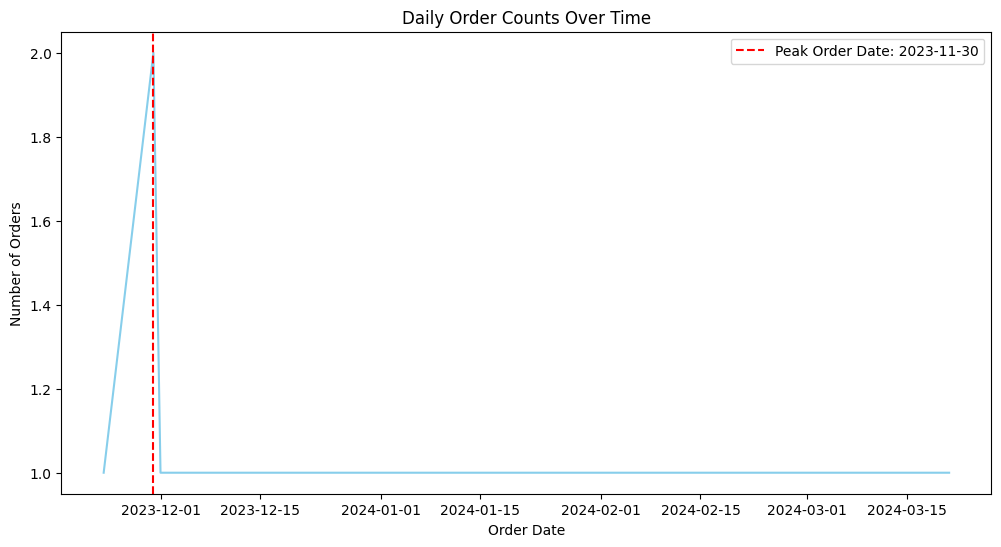

In [58]:
# Extract day, month, and year from order_date
order_df['day'] = order_df['order_date'].dt.day
order_df['month'] = order_df['order_date'].dt.month
order_df['year'] = order_df['order_date'].dt.year

# Group by date and count the number of orders for each date
daily_order_counts = order_df.groupby('order_date').size()

# Identify the peak order date
peak_order_date = daily_order_counts.idxmax()

# Plotting the results
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_order_counts.index, y=daily_order_counts.values, color='skyblue')
plt.title('Daily Order Counts Over Time')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.axvline(peak_order_date, color='red', linestyle='--', label=f'Peak Order Date: {peak_order_date.strftime("%Y-%m-%d")}')
plt.legend()
plt.show()

The line graph titled “Daily Order Counts Over Time” shows a sharp decline in daily order counts after reaching a peak on November 30, 2023. This suggests that there was a surge in orders towards the end of November 2023, but this trend did not continue, leading to a significant drop in daily orders over the subsequent months. This could indicate a seasonal trend or a one-time event that caused the spike in orders.

#### **Geographical Analysis:**

##### *Explore the distribution of customers across different cities**

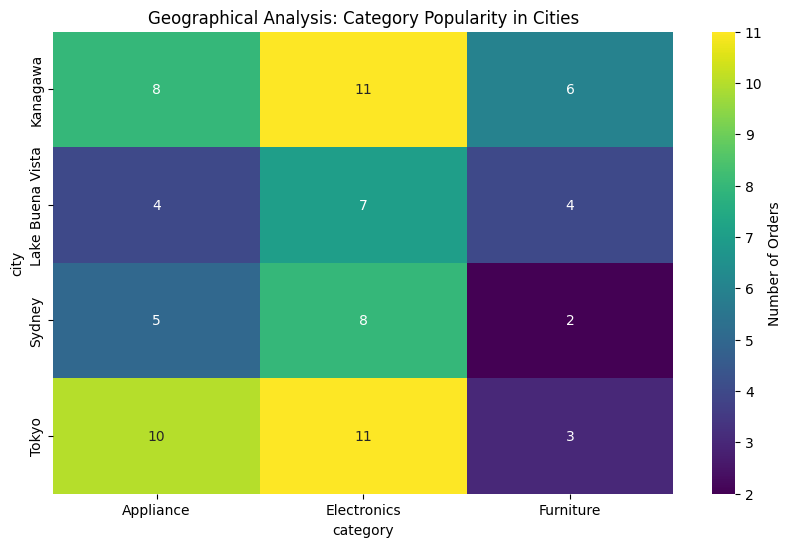

In [59]:
# Create a pivot table to get the count of orders for each category in each city
pivot_table = pd.pivot_table(cust_ord_df, values='order_id', index='city', columns='category', aggfunc='count', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g',cbar_kws={'label': 'Number of Orders'})
plt.title('Geographical Analysis: Category Popularity in Cities')
plt.show()

The heat titled “Geographical Analysis: Category Popularity in Cities” compares the popularity of three categories (Appliance, Electronics, Furniture) across four cities (Kanagawa, City Lake Buena Vista, Sydney, Tokyo). The Electronics category is most popular in Kanagawa and Tokyo, while in City Lake Buena Vista and Sydney, Appliance and Electronics are equally popular. This suggests that consumer preferences for these categories vary by location.

#### **Product Performance:**

#### **Customer Retention:**

##### *Analyze repeat customers and their order patterns*

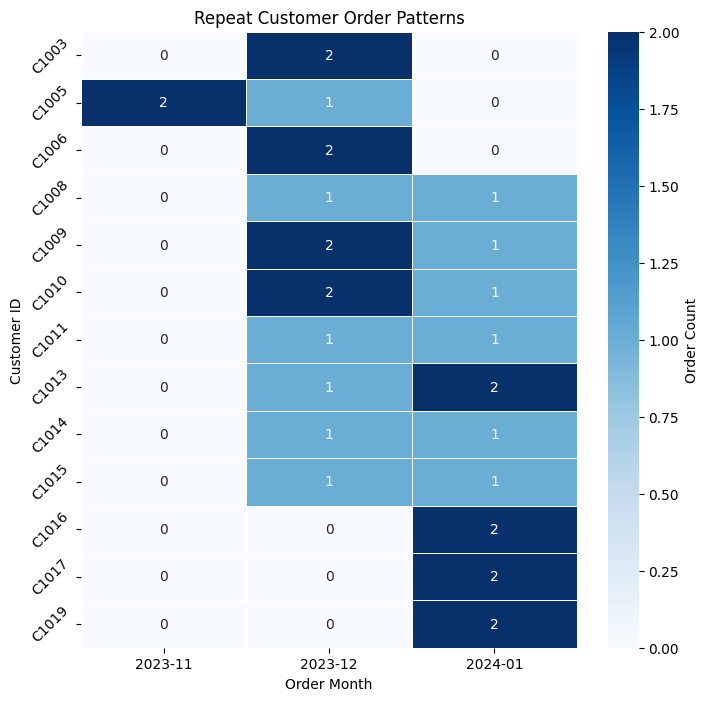

In [60]:
# Extract the year-month from the 'order_date'
cust_ord_df['order_month'] = cust_ord_df['order_date'].dt.to_period('M')

# Identify repeat customers based on the number of orders
repeat_customers = cust_ord_df['customer_id'].value_counts()[cust_ord_df['customer_id'].value_counts() > 1].index

# Create a DataFrame for repeat customers
repeat_customers_df = cust_ord_df[cust_ord_df['customer_id'].isin(repeat_customers)]

# Analyze repeat customer order patterns
order_count_per_month = repeat_customers_df.groupby(['customer_id', 'order_month']).size().reset_index(name='order_count')

# Visualize repeat customer order patterns using a seaborn heatmap with custom colorbar settings
plt.figure(figsize=(8, 8))
heatmap_data = order_count_per_month.pivot(index='customer_id', columns='order_month', values='order_count').fillna(0)
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt=".0f", linewidths=.5, cbar_kws={'label': 'Order Count'})
plt.title('Repeat Customer Order Patterns')
plt.xlabel('Order Month')
plt.ylabel('Customer ID')
plt.yticks(rotation=45, ha='right')
plt.show()

The heatmap titled “Repeat Customer Order Patterns” shows the order patterns of repeat customers over three months (November 2023 to January 2024). Most customers placed orders in December 2023 and January 2024, with fewer orders in November 2023. Customers C1005, C1009, C1010, and C1016 have the highest frequency of orders with two counts in at least one of the months. This suggests that customer ordering behavior varies over time, with certain customers showing more consistent ordering patterns.

##### *Calculate customer retention rates over time*

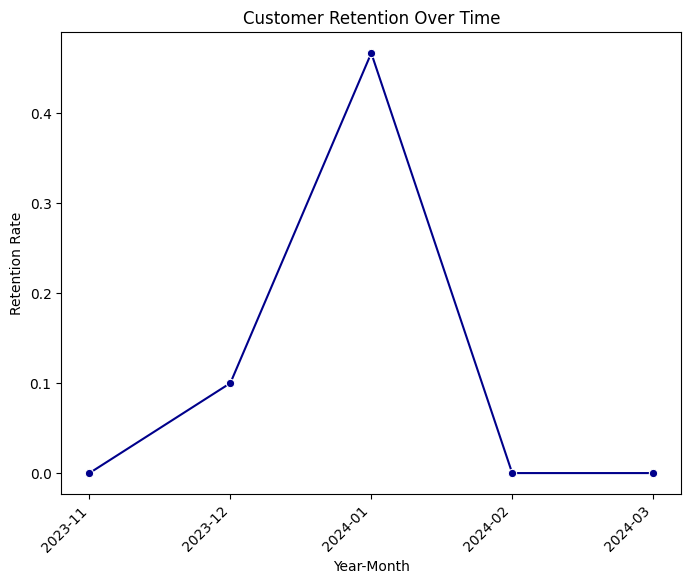

In [61]:

# Extract year-month from order_date
cust_ord_df['year_month'] = cust_ord_df['order_date'].dt.to_period('M')

# Group by customer_id and year_month to count the number of unique orders per month
monthly_orders = cust_ord_df.groupby(['customer_id', 'year_month'])['order_id'].nunique().reset_index()

# Identify the first order month for each customer
first_order_month = monthly_orders.groupby('customer_id')['year_month'].min().reset_index()
first_order_month.columns = ['customer_id', 'first_order_month']

# Merge the dataframes to associate each order with the first order month
monthly_orders = pd.merge(monthly_orders, first_order_month, on='customer_id')

# Calculate the retention rate for each month
monthly_orders['is_retained'] = monthly_orders['year_month'] > monthly_orders['first_order_month']
retention_rate = monthly_orders.groupby('year_month')['is_retained'].mean()

# Plotting the results
plt.figure(figsize=(8, 6))
sns.lineplot(x=retention_rate.index.astype(str), y=retention_rate.values, marker='o', color='DarkBlue')
plt.title('Customer Retention Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45, ha='right')
plt.show()

The graph titled “Customer Retention Over Time” shows a significant fluctuation in customer retention rate from November 2023 to March 2024. There was a sharp increase in the retention rate, peaking at about 0.4 in January 2024, which then drastically dropped to nearly zero by March 2024. This suggests that while there was a brief period of high customer retention, it was not sustained over time.

### **Conclusion:**

Tokyo has the maximum number of the customers whereas Lake Buena Vista has the minimum number of customer. Electronic category has the maximum number of products available whereas Furniture category has the minimum. Electronic sub-cateory has the maximum number of products followed by Computer, Wearables and so on. The Average Price is 17774.62, Maximum Price is 70000 and Minimum Price is 450. Tablet is the most ordered product followed by Vacuum Cleaner, Air Purifier, Chair and so on. Most of the products have been delivered, some of are pending, few have been cancelled. Tablet and Vacuum Cleaner aren of the most popular prod followed by Smartwatch, Air Purifier and so on. The total revenue is 1586400. The Electronic category has the heighest revenue percentage. Coffee Maker is the most profitable product. Tablet is the heighest ordered product whereas Didhwasher is the lowest ordered product. Heighest order has been done by Oliver. Most of the customer prefers the Online payment mode. The most sell has done in January,2024. Heighest order placed at 1st December of 2023. Most of the customer are from Tokyo. Products from the Eletronic category have been sold in higher quantities in all regions. Products from Appliance category have been sold mostly in Tokyo city. Furniture have been sold mostly in Kanagawa city. Tablet and Vacuuum Cleaner sold the most. Then Smartwatch, Air Purifier and so on. Dishwash, Eletric Toothbrush, Gaming Mouse, Monitor, Portable Charger, Projector, Recliner, Smart Scale, Smart Speaker are the most slow moving products. Oliver is the most repeated customer. Retention rates were higher between the time period of December 2023 to January 2024. Most of the orders have been successfully delivered. d growth.